In [1]:
from sklearn.datasets import load_iris

In [2]:
iris = load_iris()

In [3]:
X,y = iris.data, iris.target

In [4]:
y[y!=1]=-1

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 0)

In [7]:
from sklearn.dummy import DummyClassifier
from sklearn.svm import SVC

In [8]:
svc= SVC(kernel = 'linear',C=1).fit(X_train,y_train)
svc.score(X_test,y_test)

0.631578947368421

In [9]:
clf= DummyClassifier(strategy='most_frequent',random_state=0).fit(X_train,y_train)
clf.score(X_test,y_test)

0.5789473684210527

In [10]:
svc= SVC(kernel = 'rbf',gamma='scale',C=1).fit(X_train,y_train)
svc.score(X_test,y_test)

0.9473684210526315

In [11]:
from sklearn.datasets import load_digits

In [12]:
digits=load_digits()

In [13]:
y=digits.target == 9

In [14]:
X_train, X_test, y_train, y_test = train_test_split(digits.data,y,random_state = 0)

In [15]:
from sklearn.linear_model import LogisticRegression

In [16]:
logreg = LogisticRegression(solver = 'liblinear',C=0.1).fit(X_train,y_train)

In [17]:
pred_logred = logreg.predict(X_test)

In [18]:
from sklearn.metrics import confusion_matrix

In [19]:
cm = confusion_matrix(y_test,pred_logred)
cm

array([[401,   2],
       [  8,  39]])

In [20]:
import mglearn

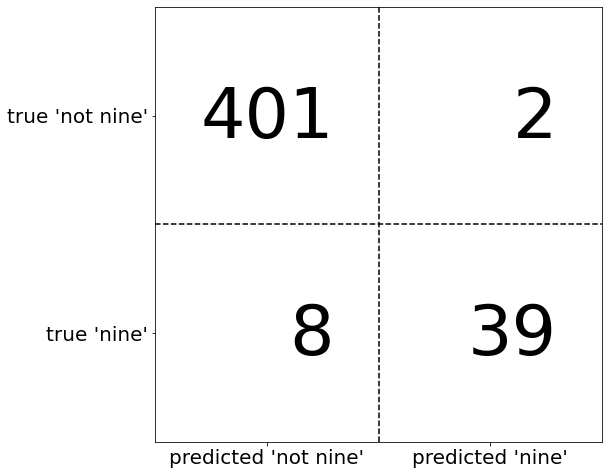

In [21]:
mglearn.plots.plot_confusion_matrix_illustration()

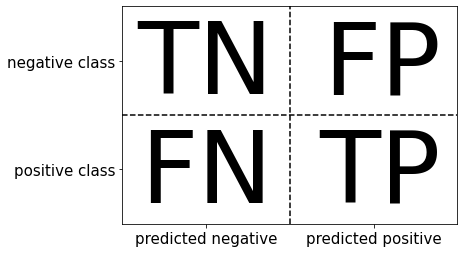

In [22]:
mglearn.plots.plot_binary_confusion_matrix()

In [23]:
from sklearn.metrics import classification_report

In [24]:
print(classification_report(y_test,pred_logred, target_names=['not nine','nine']))

              precision    recall  f1-score   support

    not nine       0.98      1.00      0.99       403
        nine       0.95      0.83      0.89        47

    accuracy                           0.98       450
   macro avg       0.97      0.91      0.94       450
weighted avg       0.98      0.98      0.98       450



In [25]:
from sklearn.metrics import roc_curve

In [26]:
fpr, tpr, thresholds = roc_curve(y_test, logreg.decision_function(X_test))

In [28]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'TPR(recall)')

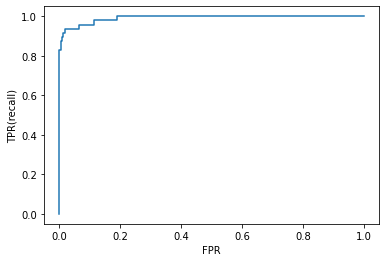

In [29]:
plt.plot(fpr,tpr,label='ROC Curve')
plt.xlabel('FPR')
plt.ylabel('TPR(recall)')

In [30]:
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target,random_state=0)

In [31]:
lr = LogisticRegression(solver='liblinear',multi_class='auto').fit(X_train,y_train)

In [32]:
pred = lr.predict(X_test)

In [33]:
from sklearn.metrics import accuracy_score

In [34]:
print(accuracy_score(y_test,pred))
cm=confusion_matrix(y_test,pred)
print(cm)

0.9533333333333334
[[37  0  0  0  0  0  0  0  0  0]
 [ 0 39  0  0  0  0  2  0  2  0]
 [ 0  0 41  3  0  0  0  0  0  0]
 [ 0  0  1 43  0  0  0  0  0  1]
 [ 0  0  0  0 38  0  0  0  0  0]
 [ 0  1  0  0  0 47  0  0  0  0]
 [ 0  0  0  0  0  0 52  0  0  0]
 [ 0  1  0  1  1  0  0 45  0  0]
 [ 0  3  1  0  0  0  0  0 43  1]
 [ 0  0  0  1  0  1  0  0  1 44]]


In [35]:
import seaborn as sns
import pandas as pd

In [36]:
df = pd.DataFrame(cm,index=digits.target_names,columns=digits.target_names)

<function matplotlib.pyplot.show(close=None, block=None)>

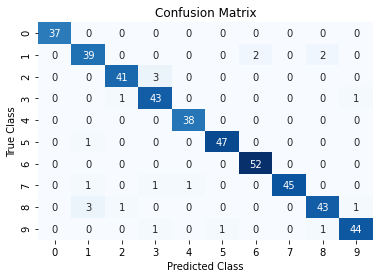

In [37]:
sns.heatmap(df,annot=True,cbar=None,cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.show